# BE/Bi 103, Fall 2015: Homework 1 Solutions

*This homework was generated from an Jupyter notebook.  You can download the notebook [here](hw1_solution.ipynb).*

In [1]:
import numpy as np
import pandas as pd

# Plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

### Problem 1.1 (Your goals, 20 pts)

Write down your goals for the class.  Is there something that has been confusing for you that you would like cleared up?  Are there specific techniques you would like to learn?

Each member of your group should write his or her own response, but the responses should be turned in together.

### Problem 1.1 solution

Thank you for your thoughts.  As we go forward in the course, we will do our best to help you achieve your goals!

<br />
<br />

### Problem 1.2 (Making a Python function and plotting it, 30 pts)

We will soon be doing regression analysis.  We will have a set of $(x,y)$ data and a model that we think describes the observed trends in the data.  For example, we may think that $y$ depends linearly on $x$, so we would propose

\begin{align}
y(x) = a x + b,
\end{align}

where $a$ and $b$ are parameters.  

In order to do the regression, we will need to write a Python function of the form `f(p, x)`, where `p` is a NumPy array containing the fit parameters.  For example, if we wanted to make a linear function, we might define the following.

In [2]:
def lin_func(p, x):
    """
    Returns `p`[0] * `x` + `p`[1].
    """
    a, b = p
    return a * x + b

One of the tricks is that your function should work if `x` is a single number or a NumPy array.  In the above example, it does, as we can see by plotting.

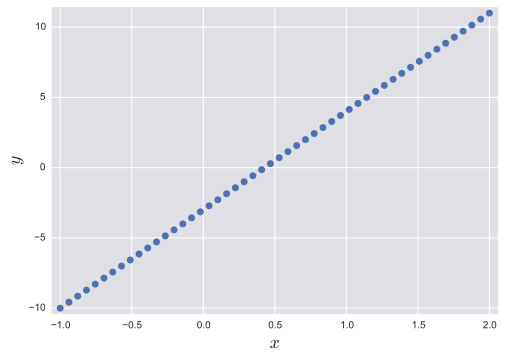

In [3]:
# Make a set of evenly spaced points in x
x = np.linspace(-1.0, 2.0, 50)

# Compute y
y = lin_func(np.array([7.0, -3.0]), x)

# Plot as dots to verify it was calculated for each value of x
plt.plot(x, y, 'o')
plt.margins(0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Write Python functions of this form (`f(p, x)`) for the following functions and make smooth plots of them for a few sets of parameter values over appropriate ranges of $x$ values.  If you think it is appropriate, plot the functions on a logarithmic or semilogarithmic scale.  Whatever you choose, give an explanation as to why you chose to plot the function the way you did.

**a)** Exponential decay + background signal:

\begin{align}
y = a + b\,\mathrm{e}^{-x/\lambda}
\end{align}

**b)** The Cauchy distribution:

\begin{align}
y = \frac{\beta}{\pi\left(\beta^2 + (x - \alpha)^2\right)}
\end{align}

**c)** The Hill function:

\begin{align}
y = \frac{x^\alpha}{k^\alpha + x^\alpha}.
\end{align}

<br />

### Problem 1.2 solution

I will first define the functions.  Given that the inputs are NumPy arrays, we usually just need to treat them like scalars when we write the functions; NumPy's element-wise operations and operator overloading are really convenient.

One small thing to keep in mind.  In Python, never use `lambda` as a variable name because `lambda` is a symbol for an [anonymous function](http://en.wikipedia.org/wiki/Anonymous_function) in Python.

In [4]:
def exp_decay_with_background(p, x):
    """
    Returns a + b * exp(-`x` / lam), with inputs
       `p`[0] = a
       `p`[1] = b
       `p`[2] = lam
    """
    a, b, lam = p
    return a + b * np.exp(-x / lam)

In [5]:
def cauchy(p, x):
    """
    Returns the value of the Cauchy distribution with location parameter
    alpha and scale parameter beta at `x`.  The inputs are:
       `p`[0] = alpha
       `p`[1] = beta
    """
    alpha, beta = p
    return beta / np.pi / (beta**2 + (x - alpha)**2)

In [6]:
def hill(p, x):
    """
    Returns the value(s) of a Hill function with Hill coefficient alpha
    that reaches a value of 0.5 at `x` = k.  I.e., returns
        x**alpha / (k**alpha + x**alpha).
    Inputs:
        `p`[0] = alpha
        `p`[1] = k
    """
    alpha, k = p
    return x**alpha / (k**alpha + x**alpha)

Now we'll generate the plots.

**a)** First, let's think about what the parameters mean.  The parameter $a$ is clearly the background signal, since $\lim_{x\to\infty} y(x) = a$.  The meaning of $\lambda$ is also obvious: it is the length scale over which the background-subtracted signal decays by a factor of $1/e\approx 1/3$.  To get the meaning of $b$, we rearrange the equation to read

\begin{align}
\frac{y - a}{b} = \mathrm{e}^{-x/\lambda}.
\end{align}

So, we see that $b$ sets the scale of the background-subtracted signal.

We would often like to plot an exponential decay with the $y$-axis on a log scale because the slope then allows use to easily deduce $\lambda$.  If we naively try plot the signal without background subtraction on a log scale, we do not get a nice line.

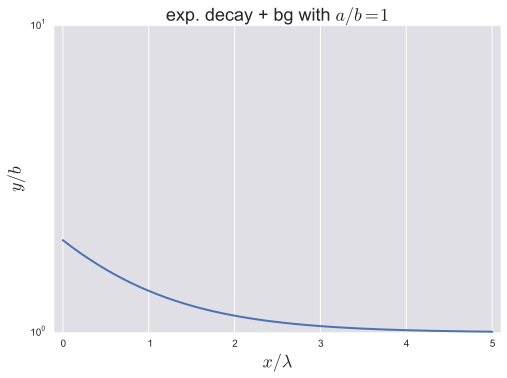

In [7]:
# Set params to unity, same as plotting unit signal
a, b, lam = 1.0, 1.0, 1.0

# Put into NumPy array for passing into the function
p = np.array([a, b, lam])

# 200 points gives a smooth curve (we don't need it, since it'll be linear)
x = np.linspace(0.0, 5.0, 200)

# Generate y data
y = exp_decay_with_background(p, x)

# Plot the result with the y-axis on a log scale
plt.semilogy(x, y, '-')
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$y/b$')
plt.margins(x=0.02)
plt.title('exp. decay + bg with $a/b = 1$')

So, if we were to plot the function on a log scale, we would want to plot the background subtracted signal.

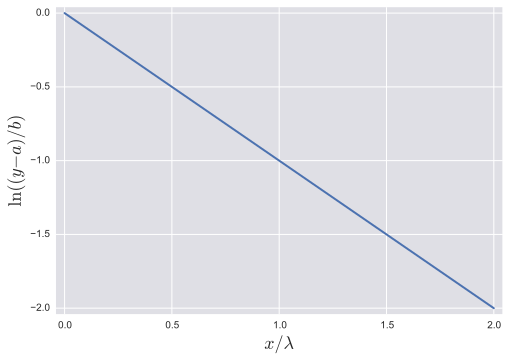

In [8]:
# Set params to unity, same as plotting unit signal
a, b, lam = 1.0, 1.0, 1.0

# Put into NumPy array for passing into the function
p = np.array([a, b, lam])

# 200 points gives a smooth curve (we don't need it, since it'll be linear)
x = np.linspace(0.0, 2.0, 200)

# Generate y data
y = exp_decay_with_background(p, x)

# Plot the result
plt.plot(x, np.log((y - a) / b), '-')
plt.margins(0.02)
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$\ln((y-a)/b)$')

Yes, we have collapsed all of the different parameter values onto one curve, which may be useful in analyzing data from several different sources which all have the same form.  However, if $y$ represents a real signal, it is unlikely we would be able to measure the signal at 1/100th its maximal value.  So, depending on what we are trying to do, it might be better to plot the result on a linear scale.  Background subtraction and $y$-axis scaling still makes sense, but we might like to see how the shape of the curves change with $\lambda$.  So, perhaps the plot below is more informative. 

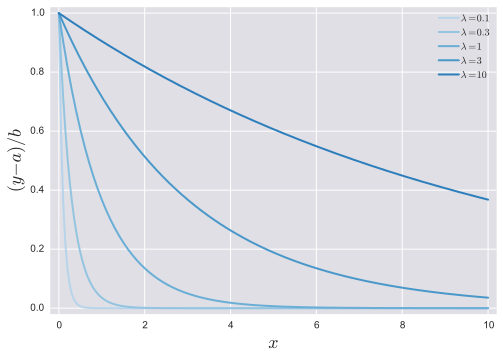

In [13]:
# a and b both unity so we plot background subtracted scaled signal
a, b = 1.0, 1.0

# Set up lambda values to plot.  A trick to get roughly logarithmically 
# spaced values that still look good in legend labels
lam_array = np.array([0.1, 0.3, 1.0, 3.0, 10.0])

# Color values (hand-coded PuBu_r class from ColorBrewer, which
# we'll look at later in the class)
colors = sns.color_palette('Blues', 9)[2:-2]

# Values of x for plotting
x = np.linspace(0.0, 10.0, 200)

# Make data and plot for each value of lambda
for lam, color in zip(lam_array, colors):
    p = np.array([a, b, lam])
    y = exp_decay_with_background(p, x)

    plt.plot(x, (y - a) / b, '-', color=color)

# Set the rest of the plot display options
plt.margins(0.02)
plt.xlabel('$x$')
plt.ylabel('$(y-a)/b$')

# Get legend labels.
leg_labels = []
for lam in lam_array:
    leg_labels.append(r'$\lambda = {0:g}$'.format(lam))
    
# Make legend
plt.legend(leg_labels, loc='upper right')

**b)** Now let's look at the Cauchy distribution.  I'll re-write its functional form again here.

\begin{align}
y = \frac{\beta}{\pi\left(\beta^2 + (x - \alpha)^2\right)}.
\end{align}

We verify that it is a peaked distribution by computing its derivative.

\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = -\frac{2\beta(x-\alpha)}{\pi\left(\beta^2 + (x-\alpha)^2\right)^2}.
\end{align}

The first derivative is zero at exactly one point, $x = \alpha$.  Also, $\lim_{x\to\pm\infty} y(x) = 0$, and $y(x) > 0 \;\forall x$, so it is a peaked distribution.  So, we see that the parameter $\alpha$ serves only to set the location of the peak.  It is therefore uninteresting to plot curves for various values of $\alpha$.  So, let's plot the Cauchy distribution for various values of $\beta$.

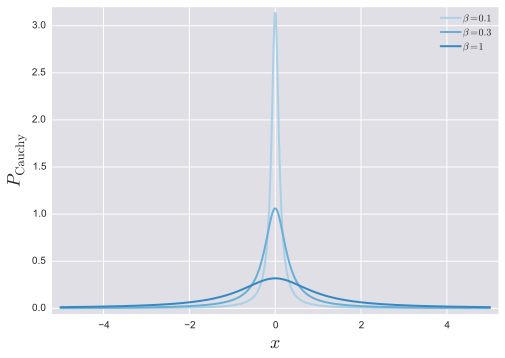

In [14]:
# Take alpha = 0, so its centered at the origin
alpha = 0.0

# Set up beta values
beta_array = np.array([0.1, 0.3, 1.0])

# Color values
colors = sns.color_palette('Blues', 5)[1:-1]

# Values of x for plotting
x = np.linspace(-5.0, 5.0, 400)

# Make data and plot for each value of lambda
for beta, color in zip(beta_array, colors):
    p = np.array([alpha, beta])
    y = cauchy(p, x)
    plt.plot(x, y, '-', color=color)

# Set the rest of the plot display options
plt.margins(0.02)
plt.xlabel('$x$')
plt.ylabel(r'$P_\mathrm{Cauchy}$')

# Get legend labels.
leg_labels = []
for beta in beta_array:
    leg_labels.append(r'$\beta = {0:g}$'.format(beta))
    
# Make legend
plt.legend(leg_labels, loc='upper right')

We see that $\beta$ sets the width of the peak of the Cauchy distribution.

It might be instructive to plot this distribution for comparison to a Gaussian.  To get the Gaussian that best matches this distribution, we expand the log Cauchy distribution in a Taylor series about its maximum.

\begin{align}
\ln P_\mathrm{Cauchy} \approx \text{constant} - \frac{(x-\alpha)^2}{\beta^2}. 
\end{align}

We find the Gaussian approximation by making it properly normalized.  So, near its peak, the Gaussian distribution that approximates the Cauchy distribution is one with a variance equal to $\beta^2/2$.

\begin{align}
P_\mathrm{Cauchy} \approx \frac{1}{\sqrt{\pi \beta^2}}\,
    \mathrm{e}^{-(x-\alpha)^2/\beta^2}
\end{align}

We can now plot the Gaussian and Cauchy distributions together and make a good comparison.  We will do it for the standard Cauchy distribution, $\alpha = 0$ and $\beta = 1$.

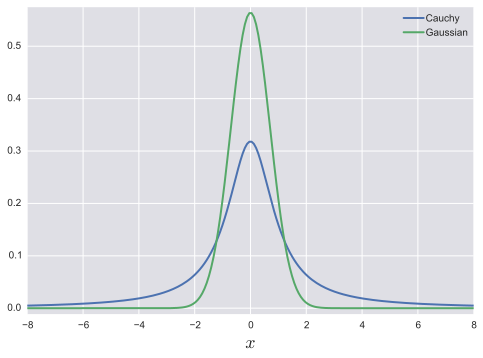

In [15]:
# Set alpha and beta for Cauchy
alpha, beta = 0.0, 1.0
p = np.array([alpha, beta])

# Set mu and sigma for Gaussian
mu, sigma = 0.0, 1.0 / np.sqrt(2.0)

# x values, go out several standard deviations
x = np.linspace(-8.0, 8.0, 200)

# Compute the Cauchy curve
y_cauchy = cauchy(p, x)

# Compute the Gaussian curve
y_gaussian = np.exp(-x**2 / 2.0 / sigma**2) / np.sqrt(2.0 * np.pi) / sigma

# Plot them together
plt.plot(x, y_cauchy, '-')
plt.plot(x, y_gaussian, '-')
plt.margins(y=0.02)
plt.xlabel(r'$x$')
plt.legend(('Cauchy', 'Gaussian'), loc='upper right')

Its main peak has roughly the same width as the Gaussian, but the Cauchy distribution as much wider tails!  This is more obvious on a log scale.

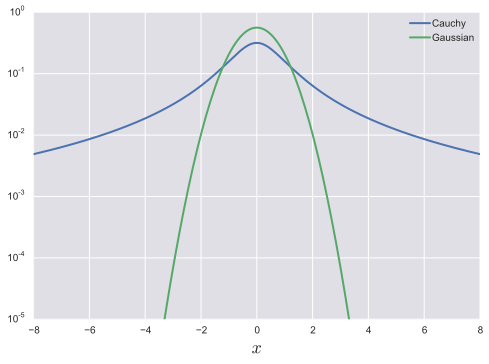

In [16]:
# Same plot, but semilogy scale.
plt.semilogy(x, y_cauchy, '-')
plt.semilogy(x, y_gaussian, '-', color=sns.color_palette()[1])
plt.ylim((1e-5, 1.0))
plt.xlabel(r'$x$')
plt.legend(('Cauchy', 'Gaussian'), loc='upper right')

Note that these plots look remarkably similar to Fig. 8.2 in Sivia.

**c)** Finally, we'll plot our Hill function.  Again, we'll start by looking at the parameters.  If we re-write the equation, we see an obvious meaning of $k$.

\begin{align}
y = \frac{x^\alpha}{k^\alpha + x^\alpha} = \frac{(x/k)^\alpha}{1+(x/k)^\alpha}.
\end{align}

So, $k$ sets the scale of the $x$-axis.  Therefore, it is uninteresting to plot the Hill function for various values of $k$.  The Hill coefficient, $\alpha$ is more interesting.  We will plot the Hill function on both linear and semilog plots.

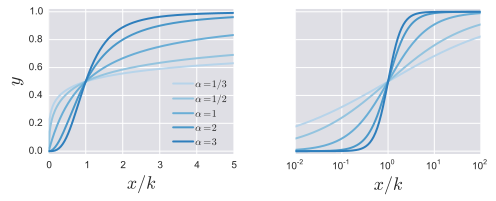

In [19]:
# Set k to unity to scale x-axis
k = 1.0

# Values of alpha
alpha_array = np.array([1.0 / 3.0, 0.5, 1.0, 2.0, 3.0])

# x values to plot, only positive values because that's where Hill functions
# make sense
x = np.linspace(0.0, 5, 200)
x_log = np.logspace(-2, 2, 200)

# Color values
colors = sns.color_palette('Blues', 9)[2:-2]

# We'll do subplots, use plt.subplots to create the axes, sharing y-axis
# ax is array of axis objects)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3), sharey=True)

# Look through and make plots
for alpha, color in zip(alpha_array, colors):
    # Compute Hill functions for both plots
    p = np.array([alpha, k])
    y = hill(p, x)
    y_log = hill(p, x_log)
    
    # Put the plots in the appropriate axis
    ax[0].plot(x, y, '-', color=color)
    ax[1].semilogx(x_log, y_log, '-', color=color)

# Set the rest of the plot properties
for a in ax:
    a.margins(y=0.02)
    a.set_xlabel('$x/k$')
ax[0].set_ylabel(r'$y$')

# Get legend labels (do it by hand to get fractions)
leg_labels = [r'$\alpha = 1/3$', r'$\alpha = 1/2$', r'$\alpha = 1$',
              r'$\alpha = 2$', r'$\alpha = 3$',]

# Make legend
ax[0].legend(leg_labels, loc='lower right')

# Tidy up
fig.tight_layout(w_pad=5)

We see that the greater $\alpha$ is, the steeper the transition from low values to high values.  In this way, the Hill coefficient is often used to describe degree of [cooperativity](http://en.wikipedia.org/wiki/Cooperativity) in interactions between molecules or genes.

<br />
<br />

### Problem 1.3 (Microtubule catastrophes I, 50 pts)

Throughout the class, we will analyze data from several sources.  We will look at some data sets repeatedly because there is plenty of interesting data analysis to be done.  One of these data sets comes from [this paper](../protected/papers/gardner_2011.pdf) by Gardner, Zanic, and coworkers.  The full reference is:
Gardner, Zanic, et al., Depolymerizing kinesins Kip3 and MCAK shape cellular microtubule architecture by differential control of catastrophe, *Cell*, **147**, 1092-1103, 2011, [10.1016/j.cell.2011.10.037](http://dx.doi.org/10.1016/j.cell.2011.10.037).

We will discuss the paper more throughout the class, and I encourage you to read it.  Briefly, the authors investigated the dynamics of microtubule catastrophe, the switching of a microtubule from a growing to a shrinking state.  In particular, they were interested in the time between the start of growth of a microtubule and the catastrophe event.  They monitored microtubules by using tubulin (the monomer that comprises a microtubule) that was labeled with a fluorescent marker.  As a control to make sure that fluorescent labels and exposure to laser light did not affect the microtubule dynamics, they performed a similar experiment using differential interference contrast (DIC) microscopy.  They measured the time until catastrophe with labeled and unlabeled tubulin.

In this problem, we will look at the data used to generate Fig. 2a of their paper.  In the end, we will generate a plot similar to Fig. 2a.

**a)** If you haven't already, download the data file [here](../protected/data/gardner_et_al_2011_time_to_catastrophe_dic.csv).  Read the data from the data file into a `DataFrame`.

**b)** I would argue that these data are not tidy.  Why?  It is possible to tidy these data without the fancy techniques we will learn next week.  Tidy the data.  *Hint*: The `dropna()` method of `DataFrame`s may come in handy.

**c)** Plot histograms of the catastrophe times for the experiments with labeled and unlabeled tubulin.  Try different settings of the plotting parameters to see what works best.  In particular, you might want to experiment with the `bins`, `normed`, and `histtype` keyword arguments.  You can show a few candidates for how you would display the data.  For your "official" histogram(s), discuss the design decisions you made to plot it the way you did.

**d)** Plot cumulative histograms for the labeled and unlabeled experiments using the same binning you used in part (c).  *Hint*: You might find the `cumulative` keyword argument of `plt.hist` useful.

**e)** Plot cumulative histograms as in Fig. 2a of the Gardner, Zanic, et al. paper.  You do not need to plot the inset of that figure.  *Hint*: Think about how to compute a cumulative histogram with no binning.  The `np.arange` function might be useful.

**f)** Which do you think is a better way to do your plots, as in part (d) or (e)?  Is there ever a reason to use the one you deem inferior?

<br />

### Problem 1.3 solution

**a)** We will first read in the data using Pandas.  I have the data stored in the directory `../data/gardner_et_al/`.

In [20]:
# Use pd.read_csv to read in the data and store in a DataFrame
fname = '../data/gardner_et_al/gardner_et_al_2011_time_to_catastrophe_dic.csv'
df = pd.read_csv(fname, comment='#')

# Look at the contents
df.head()

,time to catastrophe with labeled tubulin (s),time to catastrophe with unlabeled tubulin (s)
0,470,355
1,1415,425
2,130,540
3,280,265
4,550,1815


In [21]:
# Look at last entries, and see that we have NaN's because 
# unequal size of labeled and unlabeled.
df.tail()

,time to catastrophe with labeled tubulin (s),time to catastrophe with unlabeled tubulin (s)
206,195,NaN
207,705,NaN
208,300,NaN
209,605,NaN
210,600,NaN


Notice that there are more data points for the labeled tubulin than for the unlabeled tubulin.  Empty data points are populated with `np.nan` (which appears as "NaN" when looking at the `DataFrame`), for "not a number."  These NaN values can trip up `matplotlib` when plotting.  If you use the native plotting functions of the `DataFrame`, the NaNs are ignored (as you'll see in part (b)).  We do not want to have to deal with this, so we will convert each column in the `DataFrame` to a NumPy array.


In [22]:
# The dropna method drops the NaNs out of an array.
# The values attribute returns the values in the DataFrame as a Numpy array
labeled = df['time to catastrophe with labeled tubulin (s)'].dropna().values
unlabeled = \
        df['time to catastrophe with unlabeled tubulin (s)'].dropna().values

# Let's look at our NumPy arrays
print('labeled ({0:d} samples):'.format(len(labeled)))
print(labeled, end='\n\n')
print('unlabeled ({0:d} samples):'.format(len(unlabeled)))
print(unlabeled)

labeled (211 samples):
[ 470 1415  130  280  550   65  330  325  340   95   55  360  220  225  320
   60  210  155  875 1000  475  295  245  415  305  320  370  505 1180  440
  620  140  180  675   65  270  150  560  545  330  390   75  650  635  540
  305  575  670  585  625  820  435  635  105   95  255  500  120  270  130
  490  525  735  370  340  605  245  255  530  225  280  745  340  205  245
  135  910  340  115  180  240  850  185  390  180  525  235  105  290  380
  280  660  640  770  860  290  190  345  585  440  640  835  290  380  395
  185  490  270  860  425  445  340  135  745  980  600 1010  955  155  385
  385  140  420  600  800  410  250  185  800  885  885  520  345  135  415
  665  220  395  155  325  550  360  400  190  535  285  170  400  290 1385
  770  500  200  500  260 1730  210  595  275  510 1425  640  200  120  540
  365  280  170  100  190 1530  120 1105   80  225  710  890  680  285  195
  650  350  155 1095  465  215  365  605  520  280  610  765  290

We have two arrays of different lengths, but no NaNs around.  There is something subtle here.  Notice that the data type of the labeled array is `int`, while that of the unlabeled array is `float`.  This is because there were NaNs in the unlabeled array and `pandas` automatically assumed it was a `float` data type.  Given that we are using the Python 3 division rules, this will not affect our analysis, we will not concern ourselves with it here.  But this is a warning: watch your data types, especially when using Python 2 division!

**b)** The data are not tidy because each row does not correspond to a separate measurement.  Each row has two experiments, one for an unlabeled tubulin and one for a labeled tubilin.  In part (a), we already tidied the data.  We used rule 3 of tidy data: use a different table for each observational unit.  Here, we are saying that labeled and unlabeled tubulin constitute different types of observations, so the method of tidying we employed in the part (a) is fine.

We could, however, say that these are the same observational unit.  (In fact, rule 3 of data tidying is often a gray area, where rules 1 and 2 are not.)  In this case, we would add a column that indicates whether or not the tubulin was labeled.  As we will learn next week, we can do this conveniently using the `pd.melt()` function.

In [23]:
# Rename columns to have Boolean values
# (use 1 and 0 so as not to confuse Boolean indexing)
df = df.rename(columns={'time to catastrophe with labeled tubulin (s)': 1,
                        'time to catastrophe with unlabeled tubulin (s)': 0})

# Melt DataFrame and drop NaNs
df = pd.melt(df, value_name='time to catastrophe (s)', var_name='labeled', 
             value_vars=list(df.columns)).dropna()

# Look at the DataFrame
print(df.head(), end='\n\n')
print(df.tail())

   labeled  time to catastrophe (s)
0        1                      470
1        1                     1415
2        1                      130
3        1                      280
4        1                      550

     labeled  time to catastrophe (s)
301        0                      180
302        0                      145
303        0                      745
304        0                      390
305        0                     1410


The `DataFrame` is now tidy.  However, as I mentioned before, having two arrays, one for labeled tubulin and one for unlabeled tubulin also constitute a tidy data set, so we will use those NumPy arrays going forward.

**c)** As in the tutorial, we'll use `plt.hist` to generate the histograms and plot them.  We'll look at various ways of doing it.  First, we'll plot the histograms for labeled and unlabeled separately.  We'll use subplots as we did for the Hill functions in problem 1.2c so we can look at them side-by-side.  As a demonstration, I'll show how to use the `hist` method of the `DataFrame` to make the histograms, as this conveniently ignores the NaNs.

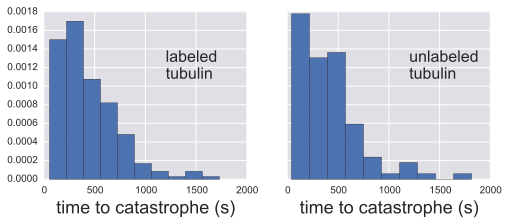

In [24]:
# Create subplots (ax is array of axis objects)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)

# Prepare the plots with 10 bins (default for plt.hist)
# ax keyword tells pandas on which axis to make the plot
_ = ax[0].hist(labeled, normed=True)
_ = ax[1].hist(unlabeled, normed=True)

# Set both subplots to have same axis limits and labels
for a in ax:
    a.set_xlim((0, 2000))
    a.set_xlabel('time to catastrophe (s)')
    
# Label the plots
ax[0].text(0.6, 0.6, 'labeled\ntubulin', fontsize=16, 
           transform=ax[0].transAxes)
ax[1].text(0.6, 0.6, 'unlabeled\ntubulin', fontsize=16, 
           transform=ax[1].transAxes)

Notice that we have used the keyword argument `normed=True`.  When this is selected, the integral over the histrogram evaluates to unity.  This is convenient if we wanted to plot a theoretical probability distribution over the histogram.  It is also convenient when comparing histograms with a different number of samples, which is what we are doing here.  If the $y$-axis were just raw counts, the two histograms would have different scales to the axis.

We often do not have much data whem making histrograms, so we need to plot with few bars.  Let's try plotting the histogram for labeled tubulin with a few different numbers of bins.

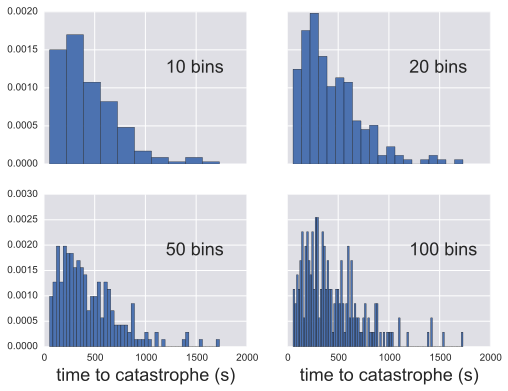

In [25]:
# Create subplots (ax is now a 2x2 array of axis objects)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), 
                                             sharey='row', sharex=True)

# Prepare the plots with different numbers of bins
_ = ax[0,0].hist(labeled, normed=True, bins=10)
_ = ax[0,1].hist(labeled, normed=True, bins=20)
_ = ax[1,0].hist(labeled, normed=True, bins=50)
_ = ax[1,1].hist(labeled, normed=True, bins=100)

# Annotate.  The transform=ax.transAxes kwarg specifies relative position
# on axis, with x and y both going from 0 to 1.
ax[0,0].text(0.6, 0.6, '10 bins', fontsize=18, transform=ax[0,0].transAxes)
ax[0,1].text(0.6, 0.6, '20 bins', fontsize=18, transform=ax[0,1].transAxes)
ax[1,0].text(0.6, 0.6, '50 bins', fontsize=18, transform=ax[1,0].transAxes)
ax[1,1].text(0.6, 0.6, '100 bins', fontsize=18, transform=ax[1,1].transAxes)

# Set x limits
plt.xlim((0, 2000))

# Axis labels
ax[1,0].set_xlabel('time to catastrophe (s)')
ax[1,1].set_xlabel('time to catastrophe (s)')

We see that with 10 bins, we just barely catch that the histogram has lower values close to zero.  We see it clearly with 20 or more bins.  With 100 bins, we have some sampling problems.  There are regions between two high bars that drop off.  (We would expect this, since we only have 211 samples to use in the histogram.)  We see some of this with 50 bins as well.

So, how do we choose the best number of bins?  We have to be careful not to bias ourselves in our bin choice; we need an unbiased way to choose bins.  There is lots of literature on the best way to do this, but for our purposes, we'll use a simple rule.  We'll choose the number of bins to be roughly $\sqrt{n}$, where $n$ is the number of data points we took.  In the case of the labeled data, this is $\sqrt{211} \approx 15$ bins.  For the unlabeled data, this is $\sqrt{95} \approx 10$ bins.

Another adjustment we might want to make it so change the units of the $x$-axis.  There is no particular reason to choose seconds.  We typically do not think of 2000 seconds of time, but we rather think about 30 minutes.  So, we can change the $x$-axis units to minutes.  As an added bonus, we have smaller probabilities on the $y$-axis (remember, the histogram must *integrate* to unity), so we do not have cumbersome tick labels like 0.0025.

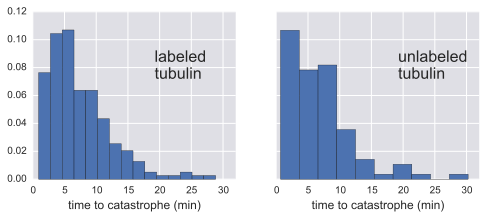

In [26]:
# Get catastrophe times in units of minutes
labeled_min = labeled / 60.0
unlabeled_min = unlabeled / 60.0

# Create subplots (ax is array of axis objects)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharey=True)

# Get number of bins
nbins_labeled = np.ceil(np.sqrt(len(labeled)))
nbins_unlabeled = np.ceil(np.sqrt(len(unlabeled)))

# Prepare the plots
_ = ax[0].hist(labeled_min, normed=True, bins=nbins_labeled)
_ = ax[1].hist(unlabeled_min, normed=True, bins=nbins_unlabeled)

# Set both subplots to have same axis limits
for a in ax:
    a.set_xlim((0, 32))
    a.set_xlabel('time to catastrophe (min)', fontsize=12)

# Label the plots
ax[0].text(0.6, 0.6, 'labeled\ntubulin', fontsize=16, 
           transform=ax[0].transAxes)
ax[1].text(0.6, 0.6, 'unlabeled\ntubulin', fontsize=16, 
           transform=ax[1].transAxes)

That looks pretty good.  We can see that they are similar in shape.  There is a problem in that we have fewer bins for the unlabeled tubulin, so we do not see the initial increase in the histogram.

We can also plot them on the same plot.  Sometimes this is desirable for side-to-side comparison.  To do this, though, we need the same number of bins.  We will use the number of bins we calculated for the labeled tubulin.  Note that because of this, this type of comparison of histograms is not preferred.

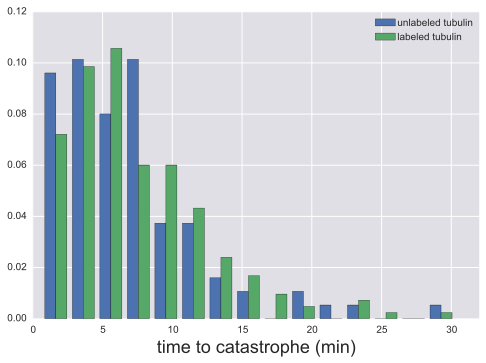

In [27]:
# Plot them both together, one blue, one red.
# alpha sets transparency (I think they look better half transparent)
_ = plt.hist((unlabeled_min, labeled_min), normed=True, bins=nbins_labeled)

# Alternatively, we could do in black and white using this:
# _ = plt.hist((labeled_min, unlabeled_min), normed=True,
#              bins=nbins_labeled, color=('darkgray', 'white'))

# Axis limits
plt.xlim((0.0, 32.0))

# Axis labels
plt.xlabel('time to catastrophe (min)')

# Legend showing colors
plt.legend(('unlabeled tubulin', 'labeled tubulin'), loc='upper right')

By default, the bars are separated when plotting two things together.  You can adjust this by using the kwarg `rwidth=1`.  I prefer them separated, since it's easier to tell how their binned; i.e., which two bars are paired.

When we plot the data this way, is is easier to directly compare the two histograms.  I still this this is difficult to parse.  Perhaps an even easier way to compare the two histograms is to use a stepped histogram with transparency.

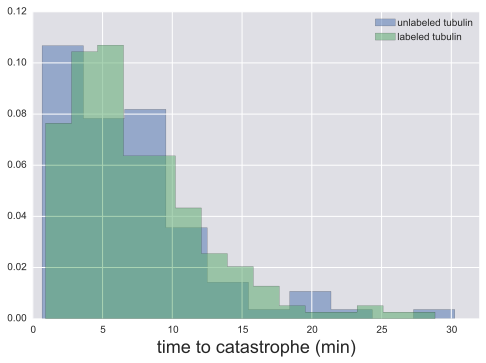

In [28]:
# Plot the unlabeled histogram in purple; zorder=1 means it goes in front
# set transparency with alpha=0.5.
_ = plt.hist(unlabeled_min, normed=True, bins=nbins_unlabeled, 
             histtype='stepfilled', alpha=0.5, zorder=0)

# Now plot the unlabeled histogram on top of it in purple with transparency
_ = plt.hist(labeled_min, normed=True, bins=nbins_labeled, 
             histtype='stepfilled', alpha=0.5, zorder=1)

# Axis limits
plt.xlim((0.0, 32.0))

# Axis labels
plt.xlabel('time to catastrophe (min)')

# Legend showing colors
plt.legend(('unlabeled tubulin', 'labeled tubulin'), loc='upper right')

This way of plotting the histograms allows direct comparison of differences and easy identification of places where they differ.  Because we can have different binning, this method is preferred.

**d)** Plotting the cumulative histogram is as simple as using the `cumulative` keyword argument of `plt.hist`.  For cumulative histograms, the number of bins is less relevant, since we could just plot every point we measure, as in part (d).  So, we will use the number of bins we computed for the histogram for labeled tubulin.

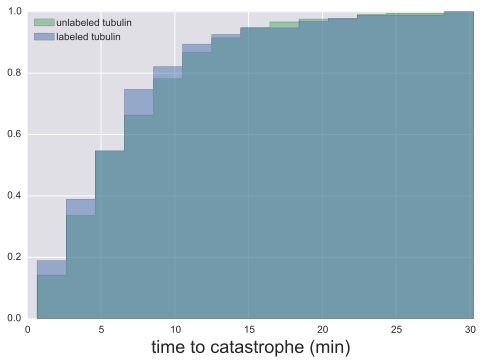

In [29]:
# When we use cumulative=True, plt.hist automatically plots on top
n, b, p = plt.hist((unlabeled_min, labeled_min), normed=True, bins=nbins_labeled, 
                   alpha=0.5, histtype='stepfilled', cumulative=True)

# Axis limits (snug fit on right with maximum bin value), and snug in y also
plt.xlim((0.0, b.max()))
plt.ylim((0.0, 1.0))

# Axis labels
plt.xlabel('time to catastrophe (min)')

# Legend showing colors
plt.legend(('unlabeled tubulin', 'labeled tubulin'), loc='upper left')

This is a bit difficult to look at, especially with the overlap.  For cumulative histograms, it is often better to just plot the lines.

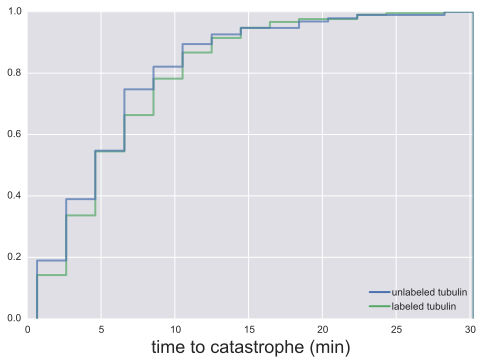

In [30]:
# Plot one at a time. Set linewidth=2 for thicker lines
# For these lines, red and black work better.
n, b, p = plt.hist((unlabeled_min, labeled_min), normed=True, 
                   bins=nbins_labeled, histtype='step', cumulative=True, 
                   linewidth=2, alpha=0.7)

# Axis limits (snug fit on right with maximum bin value), and snug in y also
plt.xlim((0.0, b.max()))
plt.ylim((0.0, 1.0))

# Axis labels
plt.xlabel('time to catastrophe (min)')

# Make dummy lines for legend (otherwise shows boxes in legend)
l1 = plt.Line2D((0,1),(0,0), color=sns.color_palette()[0])
l2 = plt.Line2D((0,1),(0,0), color=sns.color_palette()[1]) 

# Legend showing colors
plt.legend((l1, l2), ('unlabeled tubulin', 'labeled tubulin'), 
           loc='lower right')

That's better!  We can clearly see both cumulative histograms *and* compare them.

**e)** One advantage of a cumulative histogram versus the standard histogram is that we do not necessarily need to do binning.  We can instead just sort our list of measurements and keep a running total of the counts.  This is called an **empirical cumulative distribution fuction** (ECDF), and this is what is plotted in the Gardner, Zanic, et al. paper.  The sorting is easily done with the `sort` method of NumPy arrays.

In [31]:
# Do an in-place sort, since we haven't cared about ordering for anything
labeled.sort()
unlabeled.sort()

# Take a look
print(labeled[:5], '...', labeled[-5:])

[55 60 65 65 75] ... [1385 1415 1425 1530 1730]


So, that gives the $x$-axis of our cumulative histogram.  How do we get the $y$-axis?  Well, the $y$ values are really just a progress report on how close we are to considering all of our measurements.  We have 95 measurements for the unlabeled tubulin.  Therefore, the first measurement is 1/95 of the way there.  The second is 2/95, and so on.  So, the $y$ values are just (1/95, 2/95, ..., 94/95, 1).

In [32]:
# Compute the cumulative histograms
cum_labeled = np.arange(1, len(labeled)+1) / len(labeled)
cum_unlabeled = np.arange(1, len(unlabeled)+1) / len(unlabeled)

This is one way of computing the ECDF.  Other variants in common use (all of which converge to the CDF in the limit of infinitely many samples) would be to choose

    cum_labeled = np.arange(0, len(labeled)) / len(labeled)
or

    cum_labeled = np.arange(0.5, len(labeled)+0.5) / len(labeled)

For comparing two ECDFs, which we are doing here, it is just important to be consistent.

Ok, now that we have the cumulative histograms, we can plot them.  I leave the time in seconds to reproduce the plot in the Gardner, Zanic, et al. paper.

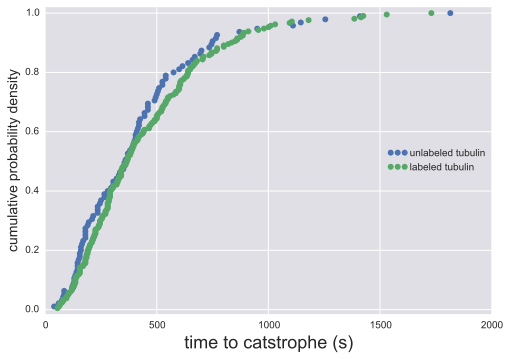

In [33]:
# Make the plot
plt.plot(unlabeled, cum_unlabeled, 'o', markersize=6, alpha=0.7)
plt.plot(labeled, cum_labeled, 'o', markersize=6, alpha=0.7)
plt.margins(y=0.02)
plt.xlabel('time to catstrophe (s)')
plt.ylabel('cumulative probability density', fontsize=14)
plt.legend(('unlabeled tubulin', 'labeled tubulin'), loc='center right',
           numpoints=3);

**f)** Plotting the ECDF is obviously better.  There is no need at all for plotting binned cumulative histograms.  In fact, plotting binned histograms to represent a probability distribution function should in general only be used if it allows you to more clearly make a point about your data.  We will talk about kernel density estimation in one of the recitations, which allows representation of PDFs without (much) binning bias.  But generally, I am a fan of plotting ECDFs.

<br />

### Problem 1.4 (Lack's measurements, up to 50 pts extra credit)
This problem is *very* open-ended.  [Dryad](http://datadryad.org) is one of many open data repositories that contain raw or processed data from scientific experiments.  Among the many little nuggets of goodness in the Dryad repository are the measurements that [David Lack](https://en.wikipedia.org/wiki/David_Lack) made of finches in the Galápagos and published in his famous book, *Darwin's Finches*.  You can get the data [here](http://datadryad.org/resource/doi:10.5061/dryad.150/1).  You should download the `.TAB` file, which is a tab-delimited table of his measurements.

Explore the data set as you like.  Make plots, describe what interests you, and give your impressions about what you see in your exploratory data analysis.  Use Pandas and the tools we learned in the first tutorial.

*Hint*: Use the `delimiter='\t'` keyword argument when using `pd.read_csv()` to read in the data.

<br />

### Problem 1.4 solution
I am very interested to see what you come up with!  We'll give points for thoughtful analysis.